### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Por hora

Dados:

In [2]:
per_hour = pd.read_csv('hour.csv', parse_dates=['dteday'])
per_hour['temp'] = per_hour['temp'] * 41
per_hour['atemp'] = per_hour['atemp'] * 50
per_hour['hum'] = per_hour['hum'] * 100
per_hour['windspeed'] = per_hour['windspeed'] * 67
per_hour.head(5)

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  9.84  14.395  81.0        0.0       3          13   16  
1           1  9.02  13.635  80.0        0.0       8          32   40  
2           1  9.02  13.635  80.0        0.0       5          27   32  
3           1  9.84  14.395  75.0        0.0       3          10   13  
4           1  9.84  14.395  75.0        0.0       0           1    1

Conhecendo as distribuições:

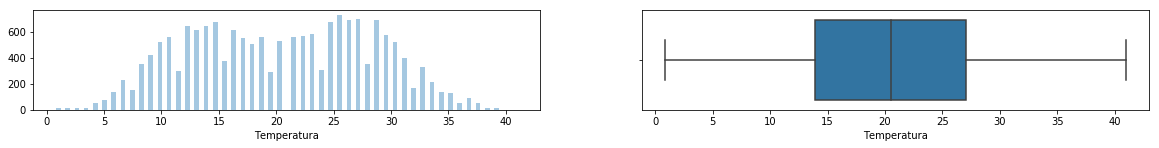

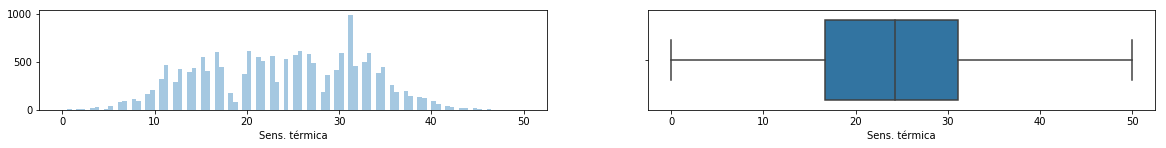

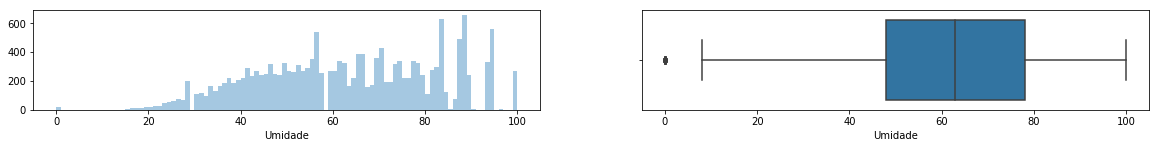

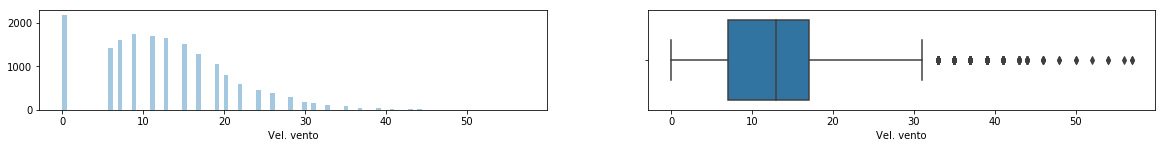

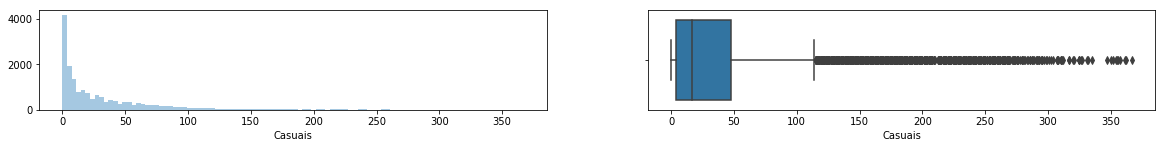

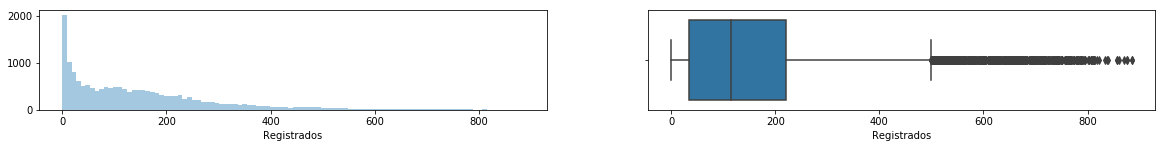

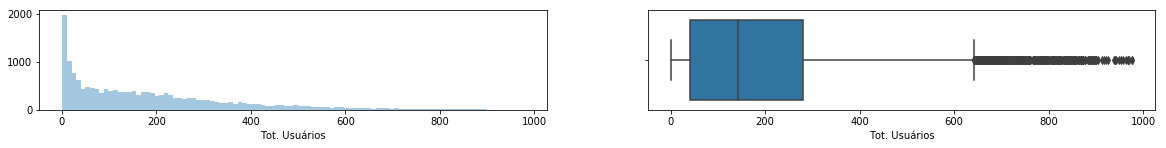

In [3]:
numericas = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
rotulos = ['Temperatura', 'Sens. térmica', 'Umidade', 'Vel. vento', 'Casuais', 'Registrados', 'Tot. Usuários']

def plotar_distribuicoes(df_filtro):
    for i in range(len(numericas)):
        plt.figure(figsize=(20, 15))
        plt.subplot(len(numericas), 2, 1)
        sns.distplot(df_filtro[numericas[i]], kde=False, bins=100)
        plt.xlabel(rotulos[i])
        plt.subplot(len(numericas), 2, 2)
        sns.boxplot(df_filtro[numericas[i]])
        plt.xlabel(rotulos[i])
        plt.show()
        
plotar_distribuicoes(per_hour)

Os outliers indicam muitos instantes com uso acima da média! O que esses momentos têm de especial?

Proporcionalmente, a maior variação está nos casuais, então vamos filtrar esses instantes:

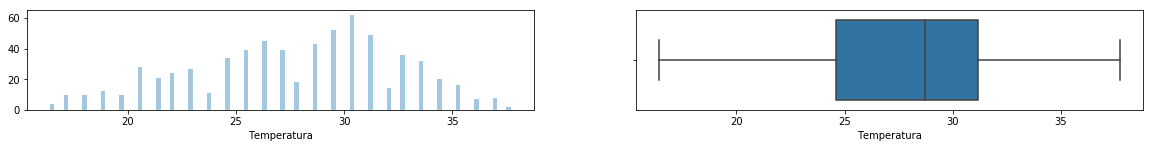

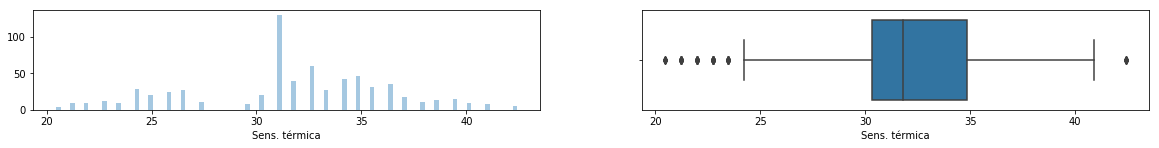

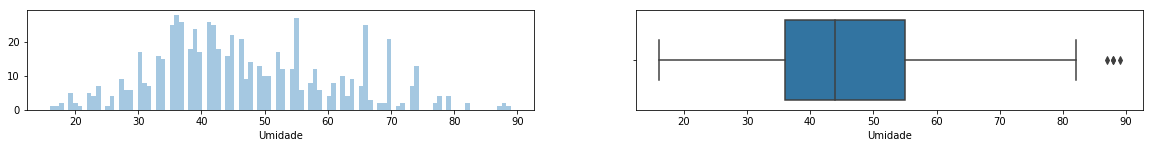

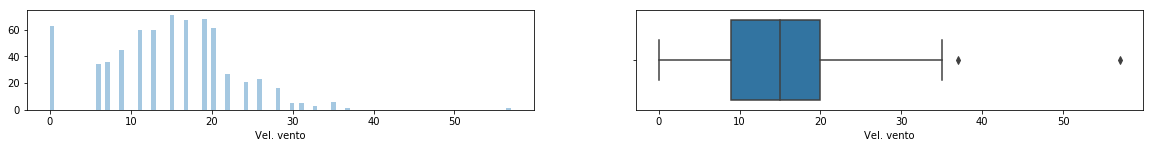

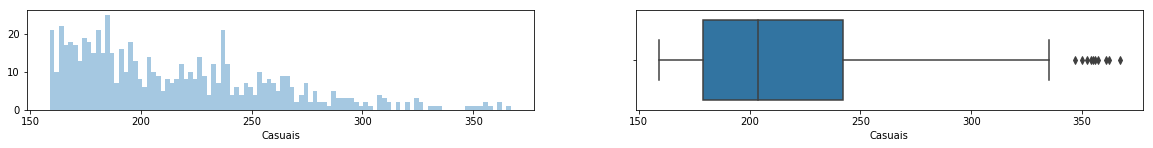

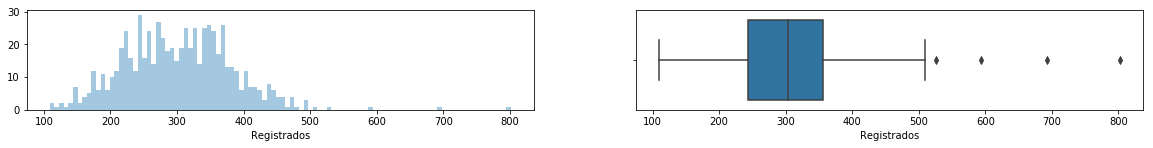

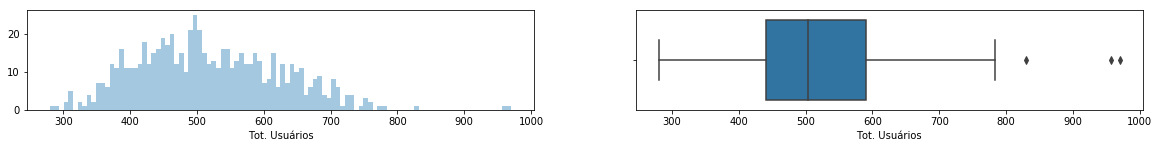

In [4]:
media = per_hour['casual'].mean()
desv_pad = per_hour['casual'].std()
muitos_usuarios = per_hour[per_hour['casual'] > media + 2.5*desv_pad]
plotar_distribuicoes(muitos_usuarios)

Conclusões até aqui:

* Estava quente
* Estava seco (mas não tanto)

Agora vamos para as categóricas, nesses instantes divertidos em que todo mundo resolve passear de bike!

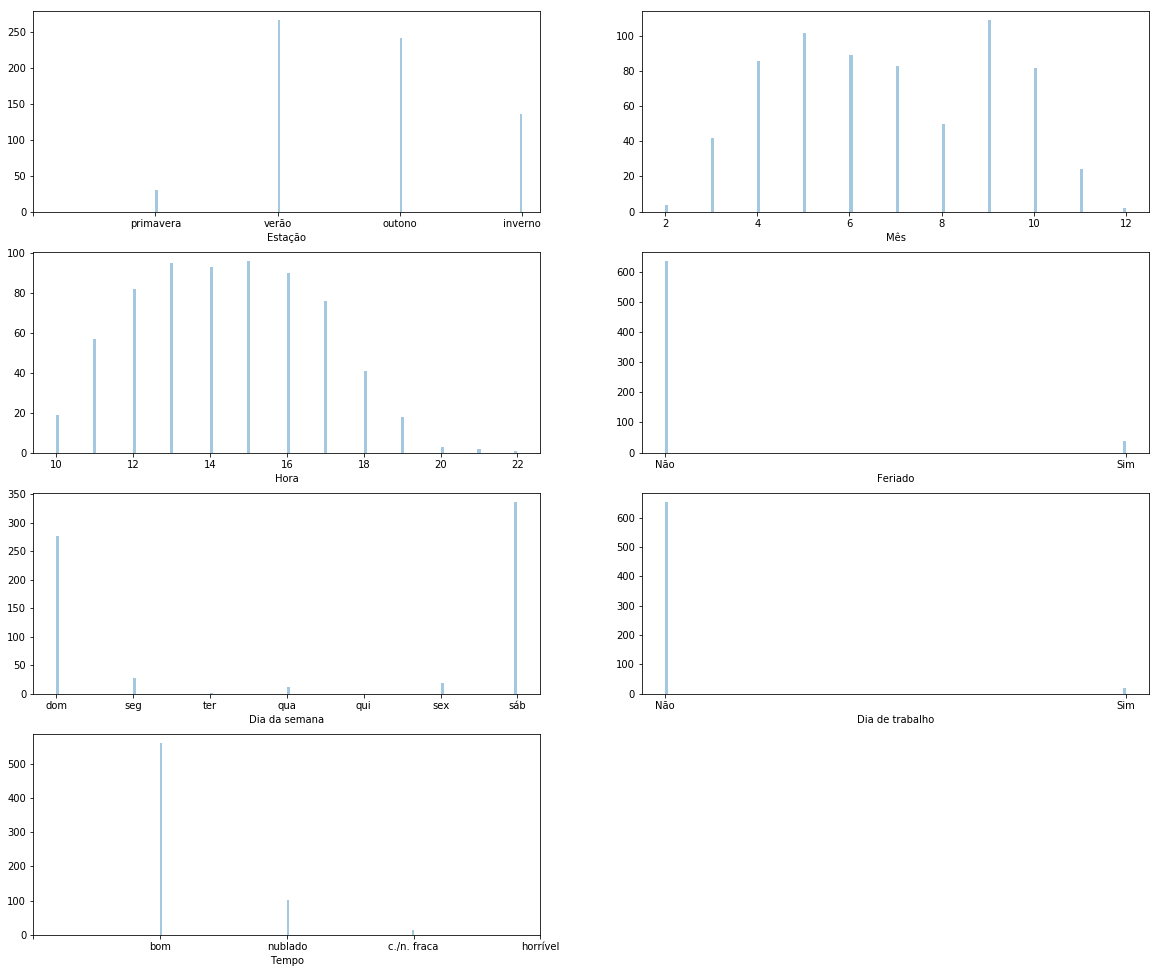

In [5]:
sim_nao = ['Não', 'Sim']
estacao = ['', 'primavera', 'verão', 'outono', 'inverno']
dia_semana = ['dom', 'seg', 'ter', 'qua', 'qui', 'sex', 'sáb']
situacao = ['', 'bom', 'nublado', 'c./n. fraca', 'horrível']

categoricas = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
rotulos_eixos = ['Estação', 'Mês', 'Hora', 'Feriado', 'Dia da semana', 'Dia de trabalho', 'Tempo']
rotulos_valores = [estacao, None, None, sim_nao, dia_semana, sim_nao, situacao]

def plots_categoricos(df):
    c = 1
    plt.figure(figsize=(20, 17))
    for i in range(len(categoricas)):
        plt.subplot(4, 2, c)
        p = sns.distplot(df[categoricas[i]], kde=False, bins=150)
        if rotulos_valores[i] != None:
            p.set(xticks=range(len(rotulos_valores[i])), xticklabels=rotulos_valores[i])
        plt.xlabel(rotulos_eixos[i])
        c += 1
    plt.show()
    
plots_categoricos(muitos_usuarios)

Até aqui:

* Estações de clima ameno (olhando pelo mês)
* Fins de semana / dias sem trabalho
* De tarde
* *Estranho:* a descrição das estações parece ter um erro!

Quais as datas de ocorrência de cada estação? Lembrando que os dados são do hemisfério norte:

In [6]:
per_hour.groupby(['yr', 'season']).agg({'dteday': ['min', 'max']})

dteday           
                 min        max
yr season                      
0  1      2011-01-01 2011-12-31
   2      2011-03-21 2011-06-20
   3      2011-06-21 2011-09-22
   4      2011-09-23 2011-12-20
1  1      2012-01-01 2012-12-31
   2      2012-03-21 2012-06-20
   3      2012-06-21 2012-09-22
   4      2012-09-23 2012-12-20

As estações corretas parecem ser:
* *1* = inverno (dez-mar)
* *2* = primavera (mar-jun)
* *3* = verão (jun-set)
* *4* = outono (set-dez)

Agora os instantes com mais usuários registrados que a média:

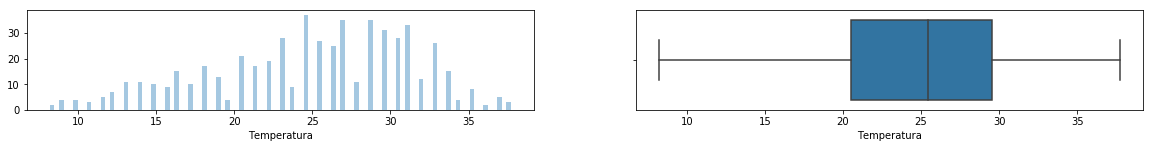

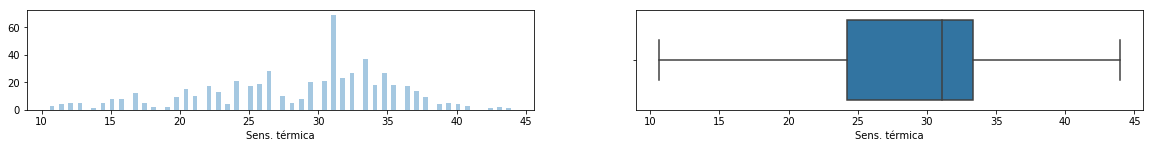

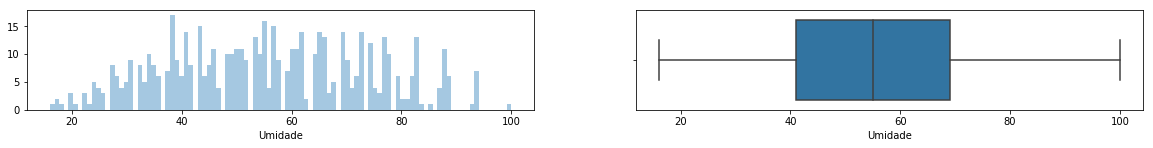

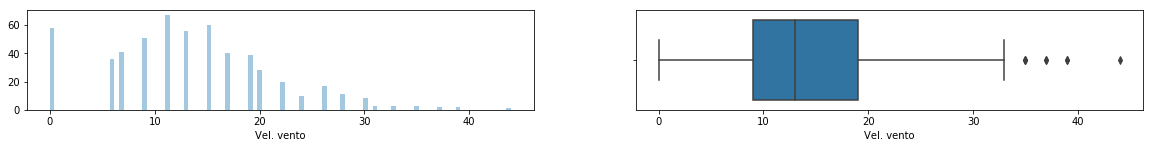

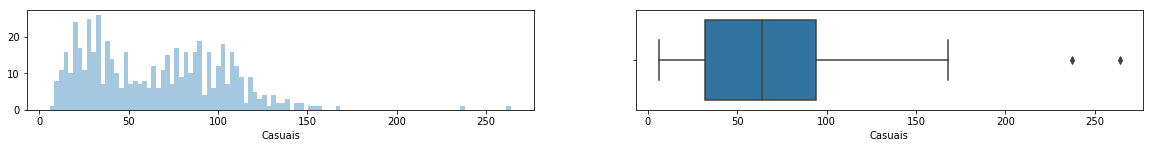

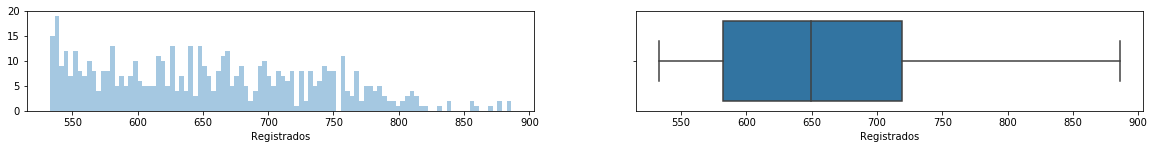

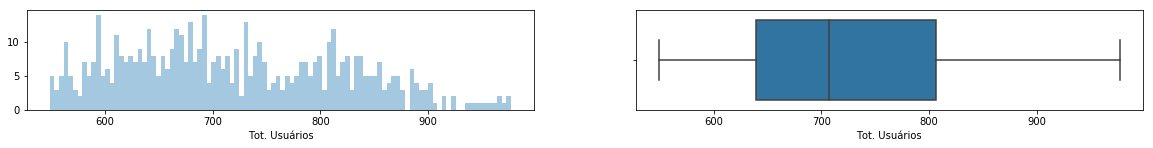

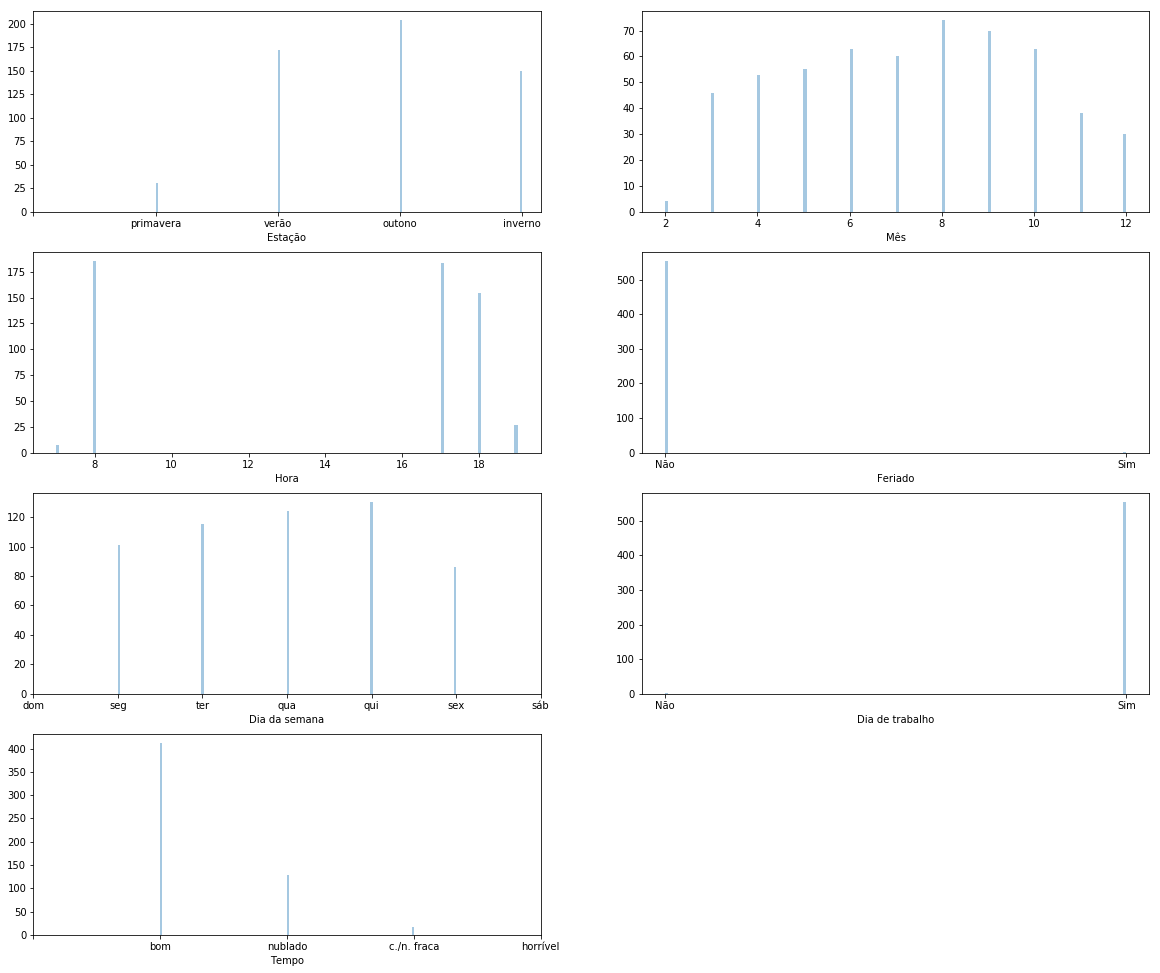

In [7]:
media = per_hour['registered'].mean()
desv_pad = per_hour['registered'].std()
muitos_usuarios = per_hour[per_hour['registered'] > media + 2.5*desv_pad]
plotar_distribuicoes(muitos_usuarios)
plots_categoricos(muitos_usuarios)

Tem um pico maluco no `atemp`...

Uso nos dias de trabalho:

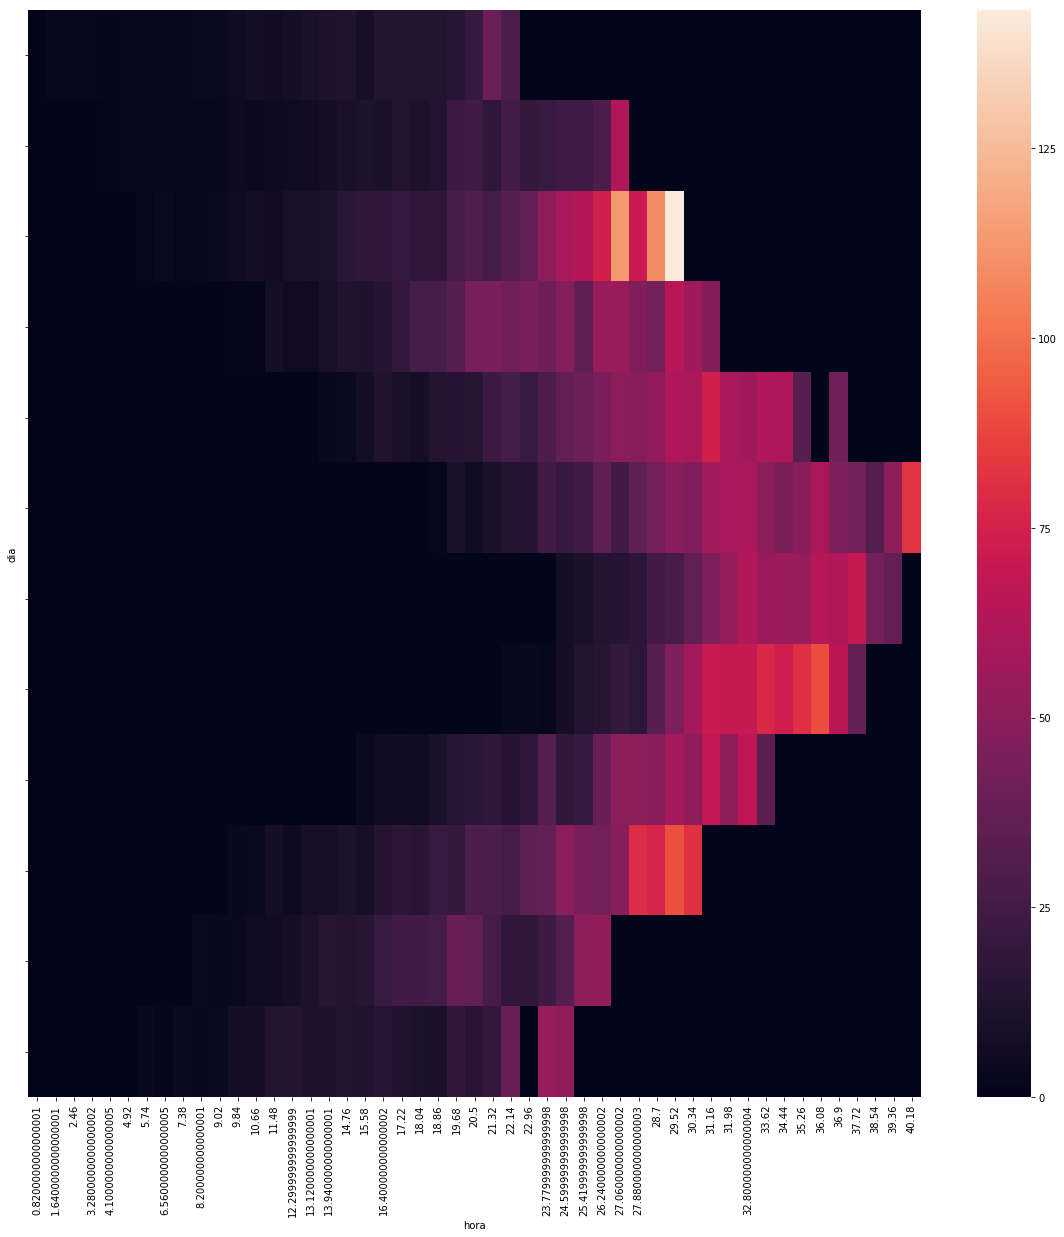

In [24]:
cross = dias_trabalho.groupby(['mnth', 'temp']).agg({'casual': 'mean'}).unstack().fillna(0)
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(cross)
heatmap.set(xlabel='hora', ylabel='dia', 
        xticklabels=cross.columns.levels[1], yticklabels=[])
plt.show()

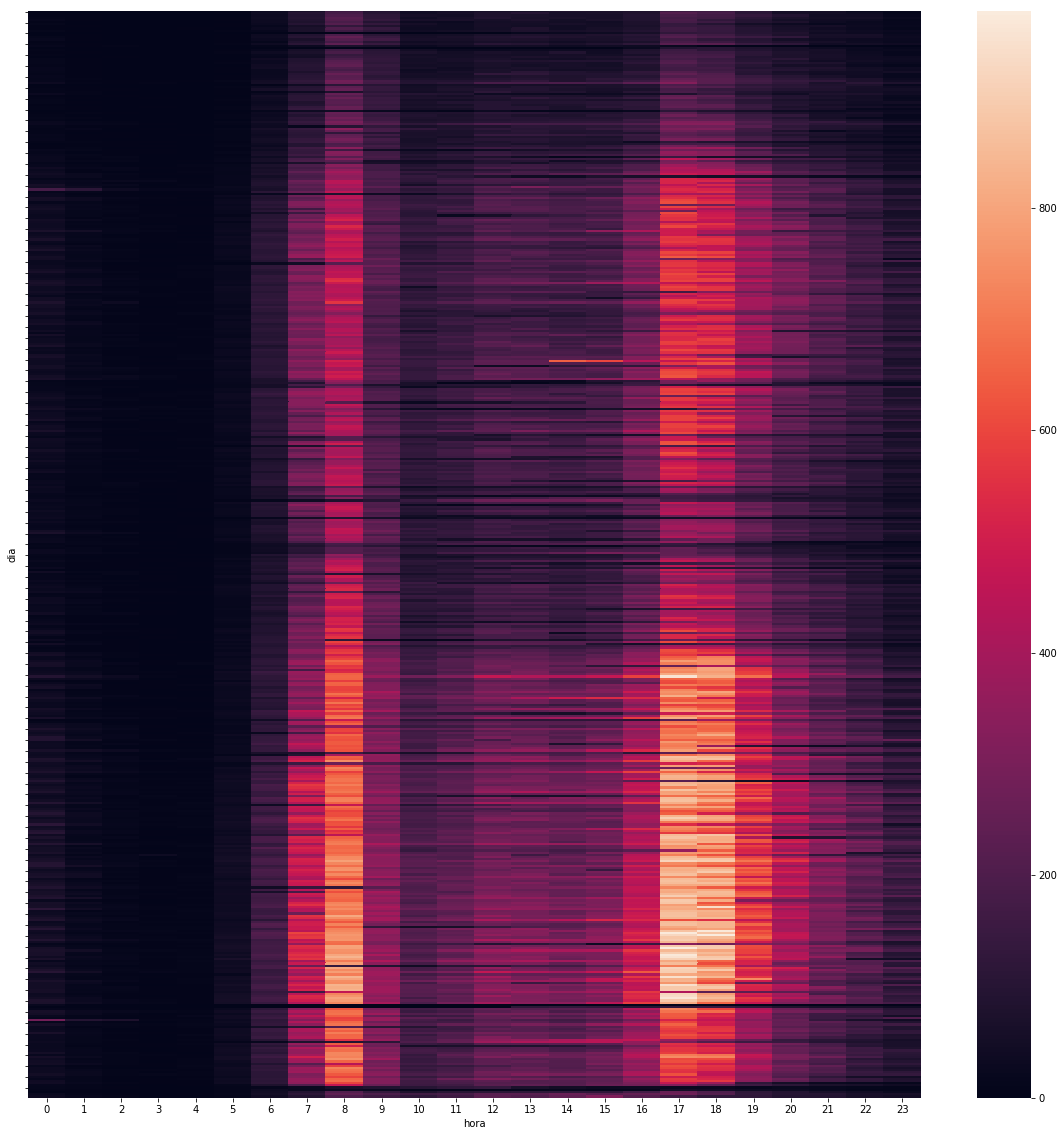

In [20]:
dias_trabalho = per_hour[per_hour['workingday'] == 1]
cross = dias_trabalho.groupby(['dteday', 'hr']).agg({'cnt': 'mean'}).unstack().fillna(0)
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(cross)
heatmap.set(xlabel='hora', ylabel='dia', 
        xticklabels=cross.columns.levels[1], yticklabels=[])
plt.show()

Uso nos dias de lazer:

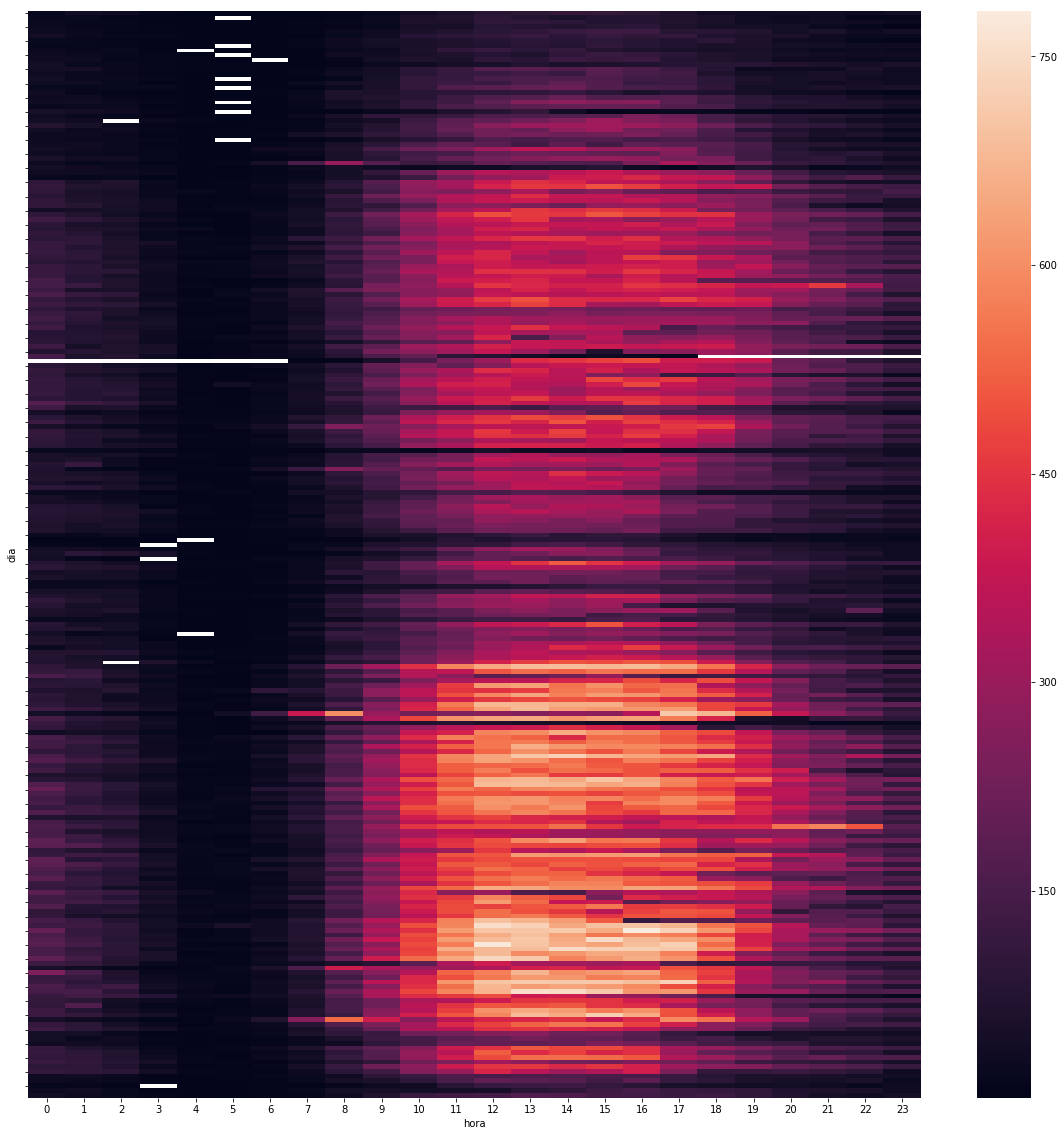

In [9]:
dias_lazer = per_hour[per_hour['workingday'] == 0]
cross = dias_lazer.groupby(['dteday', 'hr']).agg({'cnt': 'mean'}).unstack()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(cross)
heatmap.set(xlabel='hora', ylabel='dia', 
        xticklabels=cross.columns.levels[1], yticklabels=[])
plt.show()

### Por dia

Dados:

In [10]:
per_day = pd.read_csv('day.csv', parse_dates=['dteday'])
per_day['temp'] = per_day['temp'] * 41
per_day['atemp'] = per_day['atemp'] * 50
per_day['hum'] = per_day['hum'] * 100
per_day['windspeed'] = per_day['windspeed'] * 67
per_day.head(5)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Um é somente o agregado do outro?

Juntando as contagens. As contagens `_x` são por dia; as `_y` são por hora:

In [11]:
colunas = ['dteday', 'casual', 'registered', 'cnt']
merge = per_day[colunas].merge(per_hour[['hr'] + colunas], on='dteday', how='outer')
merge.head(5)

dteday  casual_x  registered_x  cnt_x  hr  casual_y  registered_y  cnt_y
0 2011-01-01       331           654    985   0         3            13     16
1 2011-01-01       331           654    985   1         8            32     40
2 2011-01-01       331           654    985   2         5            27     32
3 2011-01-01       331           654    985   3         3            10     13
4 2011-01-01       331           654    985   4         0             1      1

Reduzindo por dia: totais batem?

In [12]:
total_dia = merge.groupby(['dteday', 'casual_x', 'registered_x', 'cnt_x'], as_index=False) \
     .agg({'casual_y': 'sum', 'registered_y': 'sum', 'cnt_y': 'sum'})
print('Casual não bate:', len(total_dia[total_dia['casual_x'] != total_dia['casual_y']]))
print('Registrado não bate:', len(total_dia[total_dia['registered_x'] != total_dia['registered_y']]))
print('Total casual+registrado não bate:', len(total_dia[total_dia['cnt_x'] != total_dia['cnt_y']]))

Casual não bate: 0
Registrado não bate: 0
Total casual+registrado não bate: 0


Yes :)